Name: Rian Barrett 
Student_ID: 31165176
Tutorial: CL_Chn-20.Menzies_S108

# FIT1043 Assignment 1

## Task A: Data Exploration and Visualisation

### A1. Exploring Smartcard Types

#### 1. How many different (unique) smartcard types are recorded in the ‘Smartcard.Type’ column? What are those different smartcard types and how many instances are recorded for each type?

In [3]:
import pandas as pd 
smartcard = pd.read_csv("monthly_smartcard_replacements.csv")

In [4]:
smartcard.shape

(5792, 5)

In [5]:
smartcard.head()

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7


In [6]:
smartcard['Smartcard.Type'].nunique()

4

In [7]:
print(smartcard['Smartcard.Type'].unique())

['Photo Identification Card' 'Driver Licence Card'
 'Industry Authority Card' 'Marine Licence Ind Card']


In [8]:
print(smartcard['Smartcard.Type'].value_counts())

Smartcard.Type
Driver Licence Card          1896
Photo Identification Card    1631
Industry Authority Card      1218
Marine Licence Ind Card      1047
Name: count, dtype: int64


#### 2. Plot a barchart of the smartcard types with the bars showing the count of each smartcard type. Which smartcard type is replaced the most?

<Axes: xlabel='Smartcard.Type'>

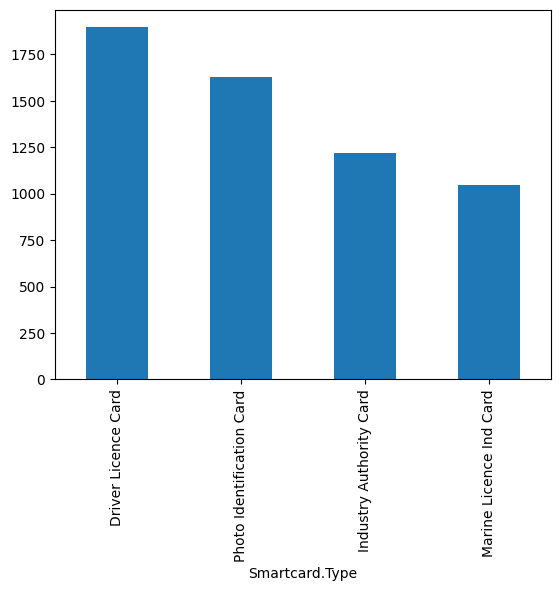

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
smartcard['Smartcard.Type'].value_counts().plot(kind='bar')

The driver license card is replaced the most 

#### 3. Calculate the percentage of records for each smartcard type.

In [10]:
smartcard['Smartcard.Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Smartcard.Type
Driver Licence Card          32.7%
Photo Identification Card    28.2%
Industry Authority Card      21.0%
Marine Licence Ind Card      18.1%
Name: proportion, dtype: object

### A2. Exploring Reasons for Smartcard Replacement

#### 1. Convert data type of column ‘Month’ to a datetime format.
Hint: Use pandas.to_datetime function to convert the type of ‘Month’ column to a datetime format as shown in one of your applied sessions.

In [11]:
smartcard.head()

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7


In [12]:
smartcard.Month = pd.to_datetime(smartcard.Month)

In [13]:
smartcard.head()

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7


In [14]:
print(smartcard.Month.dtypes)

datetime64[ns]


#### 2. What are the different reasons for smartcard replacements in the given data and how many instances are observed for each reason? 
Hint: Check the 'Action.Reason' column.

In [15]:
print(smartcard['Action.Reason'].unique())

['Change Customer Details' 'Destroyed' 'Lost In Mail - Imu'
 'Managers Approval' 'Disaster Relief' 'Lost' 'Merged' 'Stolen' 'Damaged'
 'Facial Image Is Not A True Likeness' 'Transition Laminate To Smartcard'
 'Condition Change' 'Expired' 'Product Exists Othr Surrend Void Cancel'
 'Da/dgd Smartcard Replacement Fee Exempt' 'Faulty'
 'Court Order Issued X3 Or X4 Condition' 'Marine Licence Transition'
 'Defective' 'Remove Gender From Smartcard']


In [16]:
print(smartcard['Action.Reason'].value_counts())

Action.Reason
Lost                                       539
Managers Approval                          532
Change Customer Details                    521
Lost In Mail - Imu                         519
Stolen                                     471
Destroyed                                  379
Condition Change                           364
Faulty                                     344
Damaged                                    342
Product Exists Othr Surrend Void Cancel    321
Facial Image Is Not A True Likeness        304
Transition Laminate To Smartcard           256
Merged                                     200
Court Order Issued X3 Or X4 Condition      137
Da/dgd Smartcard Replacement Fee Exempt    134
Expired                                    133
Marine Licence Transition                  132
Defective                                   88
Disaster Relief                             48
Remove Gender From Smartcard                28
Name: count, dtype: int64


#### 3. What is the total number of months in which 100 or more smartcard replacements are reported due to being "Faulty"?

In [17]:
filt = (smartcard['Action.Reason'] == 'Faulty') & (smartcard['Number.of.transactions'] >= 100)

In [18]:
filt

0       False
1       False
2       False
3       False
4       False
        ...  
5787    False
5788    False
5789    False
5790    False
5791    False
Length: 5792, dtype: bool

In [19]:
filt[1].count(True)

AttributeError: 'numpy.bool_' object has no attribute 'count'

In [21]:
df2 = smartcard.loc[(smartcard['Action.Reason'] == 'Faulty') & (smartcard['Number.of.transactions'] >= 100)]
df2.count()

Month                     59
Transaction               59
Smartcard.Type            59
Action.Reason             59
Number.of.transactions    59
dtype: int64

In [24]:
df2

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions
204,2012-05-01,Replace Smartcard,Driver Licence Card,Faulty,405
221,2012-07-01,Replace Smartcard,Driver Licence Card,Faulty,331
232,2012-10-01,Replace Smartcard,Driver Licence Card,Faulty,293
418,2015-06-01,Replace Smartcard,Driver Licence Card,Faulty,129
486,2016-01-01,Replace Smartcard,Driver Licence Card,Faulty,114
896,2011-10-01,Replace Smartcard,Industry Authority Card,Faulty,170
930,2012-04-01,Replace Smartcard,Driver Licence Card,Faulty,301
954,2012-08-01,Replace Smartcard,Driver Licence Card,Faulty,323
963,2012-09-01,Replace Smartcard,Driver Licence Card,Faulty,257
969,2012-11-01,Replace Smartcard,Driver Licence Card,Faulty,292


In [23]:
len(smartcard[(smartcard['Action.Reason'] == 'Faulty') & (smartcard['Number.of.transactions'] >= 100)])

59

In [ ]:
smartcard.head()

### A3. Investigating Annual Smartcard Replacements

#### 1. Create a new column named 'Year' extracting the year from the 'Month' column.
Hint: you can extract year from column ‘Month’ using method .dt.year and create a
new column for year as follows:
>>> your_dataframe['Year']=your_dataframe['Month'].dt.year

In [26]:
smartcard['Year']=smartcard['Month'].dt.year

In [27]:
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


#### 2. Create a line plot showing the total number of annual smartcard replacements (number of transactions) against year

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#total number of annual smartcard replacements (number of transactions) vs. year
df = smartcard.groupby('Year')['Number.of.transactions'].sum()

In [31]:
df 

Year
2010       671
2011     68418
2012    150886
2013    145192
2014    144549
2015    151109
2016    159427
2017    165726
2018    169477
2019    178395
2020    171206
2021    202671
2022     48648
Name: Number.of.transactions, dtype: int64

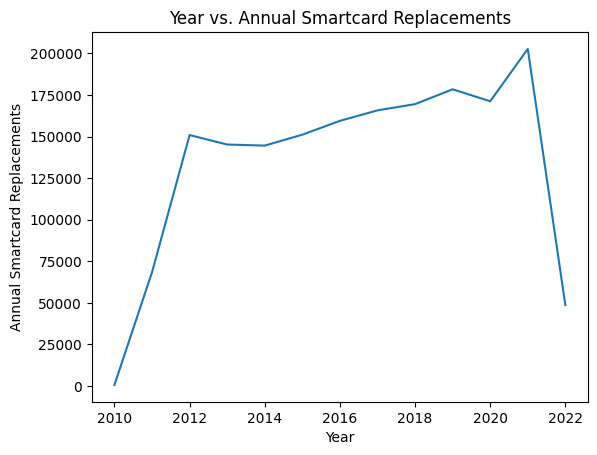

In [34]:
plt.plot(df)
plt.xlabel('Year')
plt.title('Year vs. Annual Smartcard Replacements')
plt.ylabel('Annual Smartcard Replacements')
plt.show()

#### 3. Explain the trend as observed from the chart. Are there any years that are different from others and if so, what is the reason behind it?

The trend observed from the chart shows that initial number of replacements were low in 2010 when it was perhaps still at the early stages since the release of the Smartcards. From then as more people began using smart cards the number of replacements increased drastically perhaps from a boom. Then finally perhaps from the introduction of smartcard embedded smartphones the amount of smartcards replacements decreased drastically in 2022.


limitations of data
outside explanations

### A4. Investigating Reasons for Smartcard Replacement

#### 1. Plot a barchart to display the total number of transactions for each' Action.Reason' using the available data.

In [35]:
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


In [39]:
df = smartcard.groupby('Action.Reason')['Number.of.transactions'].sum()
df

Action.Reason
Change Customer Details                    294435
Condition Change                           344905
Court Order Issued X3 Or X4 Condition       17295
Da/dgd Smartcard Replacement Fee Exempt      8012
Damaged                                     13027
Defective                                     673
Destroyed                                   14393
Disaster Relief                               313
Expired                                      2028
Facial Image Is Not A True Likeness          4272
Faulty                                      14876
Lost                                       642749
Lost In Mail - Imu                         172552
Managers Approval                           52555
Marine Licence Transition                    1822
Merged                                        507
Product Exists Othr Surrend Void Cancel      5628
Remove Gender From Smartcard                   47
Stolen                                     158356
Transition Laminate To Smartcard    

<Axes: title={'center': 'Total Number of Transactions for each Action.Reason'}, xlabel='Action.Reason', ylabel='Number of Transactions'>

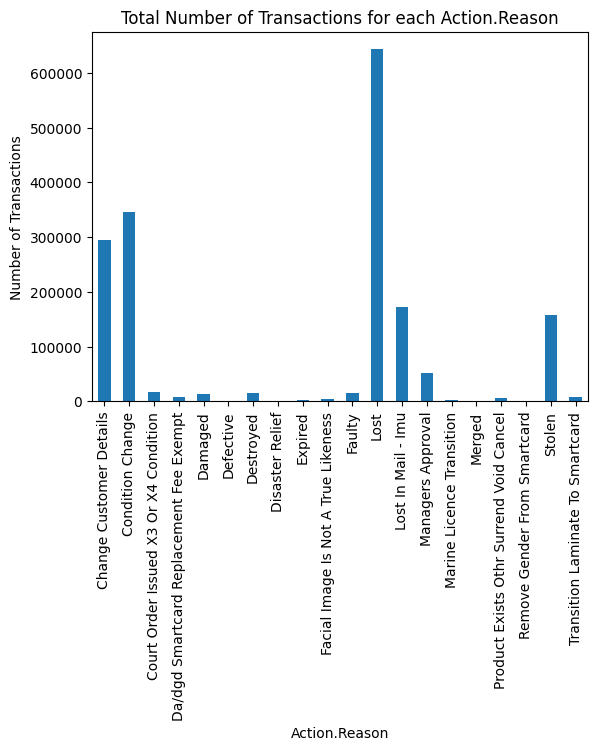

In [46]:
df.plot(kind='bar', title = 'Total Number of Transactions for each Action.Reason', ylabel='Number of Transactions', xlabel='Action.Reason')

#### 2. What are the top three reasons for smartcard replacement?

Observing the above bar chart the top three reasons for smartcard replacements are Lost, Condition Change, and Change Customer Details.

#### 3. Total number of transactions of which 'Action.Reason' is between 1000 and 2000?

In [59]:
filt = df[(df >= 1000) & (2000 >= df)]
filt

Action.Reason
Marine Licence Transition    1822
Name: Number.of.transactions, dtype: int64

In [60]:
len(filt)

1

The total number of transactions of which Action.Reason is between 1000 and 2000 is 1 and it is the Marine License Transition transaction.

In [49]:
df.loc[lambda x: x >= 1000 & 2000 >= x]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
d = {'Action.Reason':'Total.Transactions'}
df2 = df.rename(columns =d)
df2

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [54]:
df.reset_index()
df

Action.Reason
Change Customer Details                    294435
Condition Change                           344905
Court Order Issued X3 Or X4 Condition       17295
Da/dgd Smartcard Replacement Fee Exempt      8012
Damaged                                     13027
Defective                                     673
Destroyed                                   14393
Disaster Relief                               313
Expired                                      2028
Facial Image Is Not A True Likeness          4272
Faulty                                      14876
Lost                                       642749
Lost In Mail - Imu                         172552
Managers Approval                           52555
Marine Licence Transition                    1822
Merged                                        507
Product Exists Othr Surrend Void Cancel      5628
Remove Gender From Smartcard                   47
Stolen                                     158356
Transition Laminate To Smartcard    

In [56]:
df.rename(columns = {df.columns[1], 'Total.Transactions'}, inplace = True)

AttributeError: 'Series' object has no attribute 'columns'

In [53]:
df2 = pd.Series(df, name = )

TypeError: Series.name must be a hashable type

In [48]:
list(df.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
len(smartcard[(smartcard['Action.Reason'] == 'Faulty') & (smartcard['Number.of.transactions'] >= 100)])

In [57]:
df = smartcard.groupby('Action.Reason').filter(lambda s: s.Number.of.transactions.sum()>=1000 & 2000 >= s.Number.of.transactions.sum())

['Number.of.transactions'].sum()


AttributeError: 'DataFrame' object has no attribute 'Number'

### A5. Investigating Reasons over Annual Smartcard Replacement

#### 1. Find out the annual number of transactions for each 'Action.Reason' across different years for which data is available


In [61]:
smartcard

,Month,Transaction,Smartcard.Type,Action.Reason,Number.of.transactions,Year
0,2019-03-01,Replace Smartcard,Photo Identification Card,Change Customer Details,156,2019
1,2019-03-01,Replace Smartcard,Driver Licence Card,Destroyed,110,2019
2,2019-03-01,Replace Smartcard,Industry Authority Card,Lost In Mail - Imu,48,2019
3,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Managers Approval,8,2019
4,2019-03-01,Replace Smartcard,Marine Licence Ind Card,Lost In Mail - Imu,7,2019
...,...,...,...,...,...,...
5787,2020-11-01,Replace Smartcard,Photo Identification Card,Remove Gender From Smartcard,1,2020
5788,2020-12-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2020
5789,2021-07-01,Replace Smartcard,Marine Licence Ind Card,Stolen,1,2021
5790,2021-07-01,Replace Smartcard,Photo Identification Card,Merged,1,2021


In [63]:
df = smartcard.groupby(['Action.Reason', 'Year'])['Number.of.transactions'].sum()
df

Action.Reason                     Year
Change Customer Details           2010       84
                                  2011    12265
                                  2012    28446
                                  2013    28603
                                  2014    28188
                                          ...  
Transition Laminate To Smartcard  2018      410
                                  2019      453
                                  2020      576
                                  2021      738
                                  2022      156
Name: Number.of.transactions, Length: 236, dtype: int64

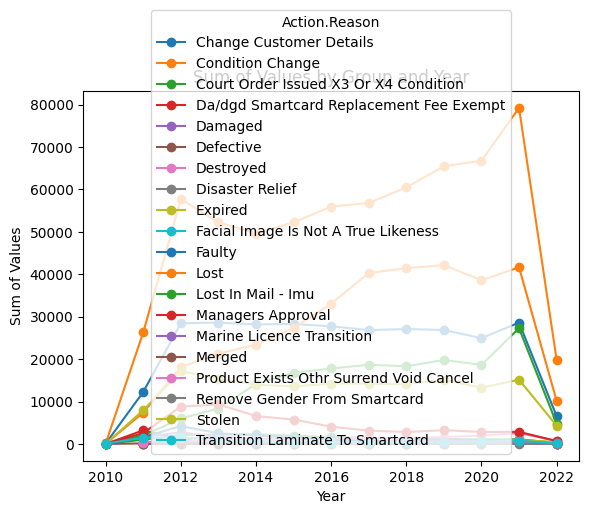

In [72]:
df = df.unstack()
df.plot(kind='line', marker='o')

plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Values by Group and Year')

plt.show()

#### 2. For each action reason determine the number of years during which the number of annual transactions exceeds 10000.

In [73]:
df2 = df.unstack()
df2

Action.Reason                     Year
Change Customer Details           2010       84.0
                                  2011    12265.0
                                  2012    28446.0
                                  2013    28603.0
                                  2014    28188.0
                                           ...   
Transition Laminate To Smartcard  2018      410.0
                                  2019      453.0
                                  2020      576.0
                                  2021      738.0
                                  2022      156.0
Length: 260, dtype: float64

In [74]:
df3 = df2[df2 > 10000]
df3

Action.Reason            Year
Change Customer Details  2011    12265.0
                         2012    28446.0
                         2013    28603.0
                         2014    28188.0
                         2015    28267.0
                         2016    27730.0
                         2017    26837.0
                         2018    27083.0
                         2019    26856.0
                         2020    24934.0
                         2021    28593.0
Condition Change         2012    18136.0
                         2013    21262.0
                         2014    23426.0
                         2015    27316.0
                         2016    33056.0
                         2017    40274.0
                         2018    41440.0
                         2019    42143.0
                         2020    38585.0
                         2021    41637.0
                         2022    10183.0
Lost                     2011    26325.0
                         20

In [75]:
len(df3)

52

In [87]:
df3 = (df2 > 10000).sum()
df3

52

In [89]:
(df2 > 10000)

Action.Reason                     Year
Change Customer Details           2010    False
                                  2011     True
                                  2012     True
                                  2013     True
                                  2014     True
                                          ...  
Transition Laminate To Smartcard  2018    False
                                  2019    False
                                  2020    False
                                  2021    False
                                  2022    False
Length: 260, dtype: bool

In [91]:
df4 = (df2 > 10000).groupby('Action.Reason').sum()
df4

Action.Reason
Change Customer Details                    11
Condition Change                           11
Court Order Issued X3 Or X4 Condition       0
Da/dgd Smartcard Replacement Fee Exempt     0
Damaged                                     0
Defective                                   0
Destroyed                                   0
Disaster Relief                             0
Expired                                     0
Facial Image Is Not A True Likeness         0
Faulty                                      0
Lost                                       12
Lost In Mail - Imu                          8
Managers Approval                           0
Marine Licence Transition                   0
Merged                                      0
Product Exists Othr Surrend Void Cancel     0
Remove Gender From Smartcard                0
Stolen                                     10
Transition Laminate To Smartcard            0
dtype: int64

In [83]:
df3 = df2[df2 > 10000]
df4 = df3.groupby('Action.Reason').sum()
df4

Action.Reason
Change Customer Details    287802.0
Condition Change           337458.0
Lost                       642625.0
Lost In Mail - Imu         151403.0
Stolen                     146077.0
dtype: float64

In [84]:
df3

Action.Reason            Year
Change Customer Details  2011    12265.0
                         2012    28446.0
                         2013    28603.0
                         2014    28188.0
                         2015    28267.0
                         2016    27730.0
                         2017    26837.0
                         2018    27083.0
                         2019    26856.0
                         2020    24934.0
                         2021    28593.0
Condition Change         2012    18136.0
                         2013    21262.0
                         2014    23426.0
                         2015    27316.0
                         2016    33056.0
                         2017    40274.0
                         2018    41440.0
                         2019    42143.0
                         2020    38585.0
                         2021    41637.0
                         2022    10183.0
Lost                     2011    26325.0
                         20

#### 3. Which action reasons have at least one year where the number of annual transactions exceeds 10000?

In [93]:
df4(df2 > 10000).groupby('Action.Reason').sum()

TypeError: 'Series' object is not callable

In [99]:
df5 = (df4 > 1)
df5

Action.Reason
Change Customer Details                     True
Condition Change                            True
Court Order Issued X3 Or X4 Condition      False
Da/dgd Smartcard Replacement Fee Exempt    False
Damaged                                    False
Defective                                  False
Destroyed                                  False
Disaster Relief                            False
Expired                                    False
Facial Image Is Not A True Likeness        False
Faulty                                     False
Lost                                        True
Lost In Mail - Imu                          True
Managers Approval                          False
Marine Licence Transition                  False
Merged                                     False
Product Exists Othr Surrend Void Cancel    False
Remove Gender From Smartcard               False
Stolen                                      True
Transition Laminate To Smartcard           False
dtype:

In [100]:
df6 = df5[df5].index.tolist()

In [101]:
df6

['Change Customer Details',
 'Condition Change',
 'Lost',
 'Lost In Mail - Imu',
 'Stolen']

#### 4. Create a histogram to analyse the distribution of the annual number of transactions per action reason as calculated in A5.1. Explain any observations and provide comments on the distribution.

In [105]:
df = smartcard.groupby(['Action.Reason', 'Year'])['Number.of.transactions'].sum()
df

Action.Reason                     Year
Change Customer Details           2010       84
                                  2011    12265
                                  2012    28446
                                  2013    28603
                                  2014    28188
                                          ...  
Transition Laminate To Smartcard  2018      410
                                  2019      453
                                  2020      576
                                  2021      738
                                  2022      156
Name: Number.of.transactions, Length: 236, dtype: int64

you can do multiple for each reason or color it on one for each reason x:Year

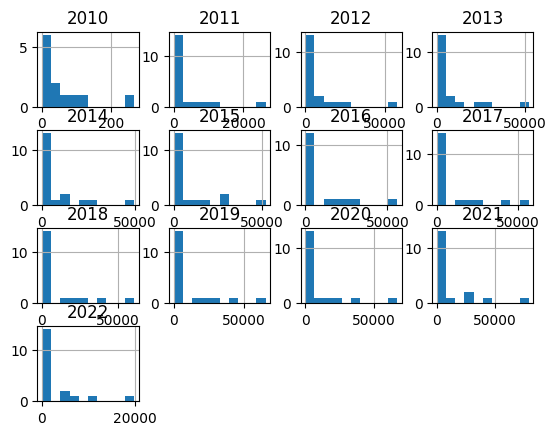

In [106]:
df2 = df.unstack()
df2.hist(bins=10)

plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Values by Group and Year')

plt.show()

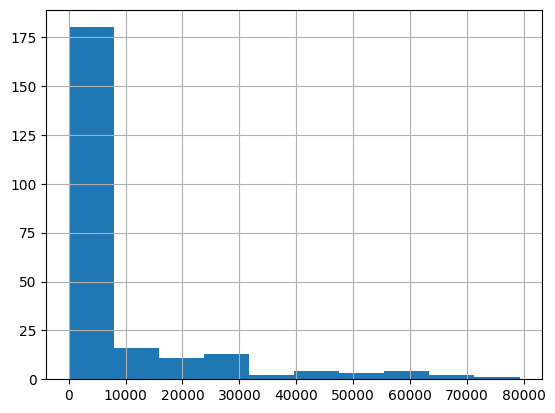

In [108]:
df.hist(bins=10)

plt.show()